In [19]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier      # 분류
from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False


In [20]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

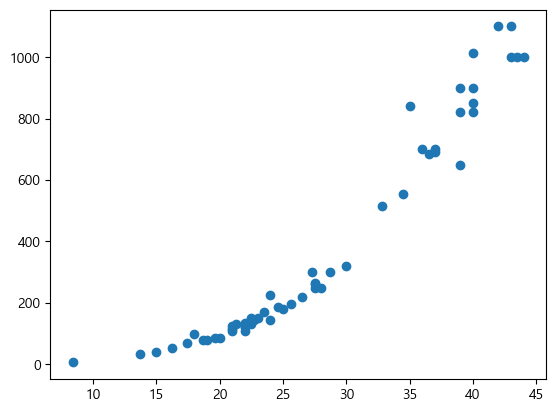

In [21]:
plt.scatter(perch_length, perch_weight)

전처리 : 0,null 있는지, 직선의 모양이 대충 어떤지 확인

In [22]:
# 데이터 전처리 - train, test 세트 구성
# random_state >> 숫자가 높을수록 랜덤 섞는 빈도가 고정 (데이터 개수만큼 쓰면 고정됨)
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [23]:
# train_input,test_input : 2차원 행렬로 변경
# 2개이상의 특성값을 가지면 2차원 행렬이 되어 reshape할 필요가 없음.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
train_input
test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [24]:
# 데이터 훈련 시키기
knr = KNeighborsRegressor()     # knn회귀
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [25]:
predict = knr.predict(test_input)
predict

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

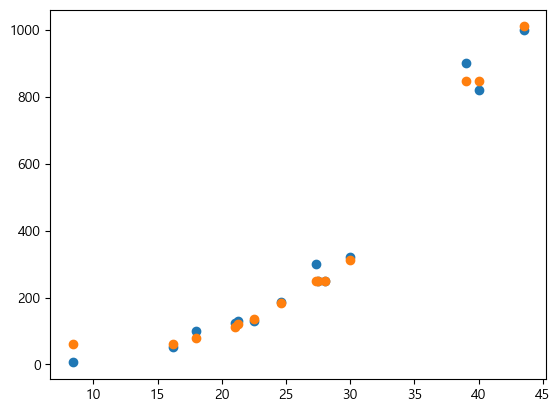

In [29]:
plt.scatter(test_input,test_target) # 파랑 - 실제값
plt.scatter(test_input,predict) # 주황 - 예측값


In [39]:
# 예측률 구하기
score = knr.score(train_input,train_target)
print('train :',score)
score = knr.score(test_input,test_target)
print('test :',score)

##### 과소적합!!!!!! n_neibor 줄여야 함!!

train : 0.9804899950518966
test : 0.9746459963987609


In [47]:
# 줄이기
knr.n_neighbors=3
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [38]:
# 줄여서 다시 예측률
score = knr.score(train_input,train_target)
print('train :',score)
score = knr.score(test_input,test_target)
print('test :',score)

train : 0.9804899950518966
test : 0.9746459963987609


In [43]:
predict = knr.predict([[16.8]])
predict

array([62.66666667])

In [61]:
# 5부터 5의 배수로 45까지 해서 (5,10,15,20,25,30,35,40,45) 길이 예측해서 그래프로 출력하시오.
a = [[i] for i in range(5,46,5)]
b = np.array([5,10,15,20,25,30,35,40,45])
# b = np.array(5,46,5)
b = b.reshape(-1,1)
knr.n_neighbors=1
predict = knr.predict(b)
predict

array([  32.,   32.,   40.,   85.,  180.,  300.,  840.,  850., 1000.])

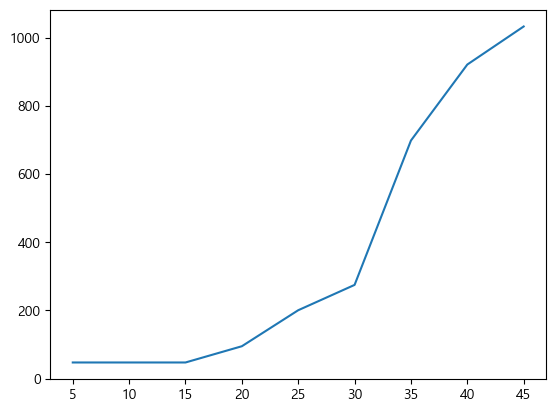

In [53]:
plt.plot(b,predict)

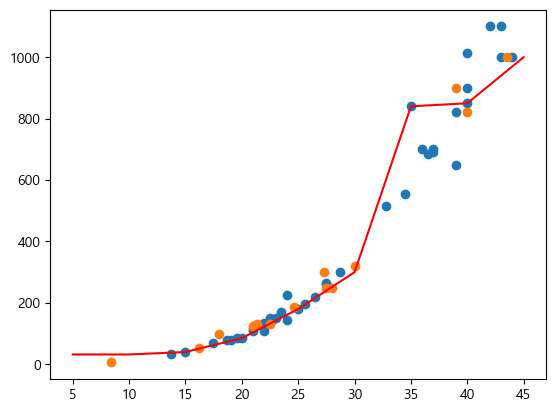

In [62]:
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)
plt.plot(b,predict,color = 'red')